In [17]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [41]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for col in columns:
    print(col['name'],col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## D1: Determine the Summary Statistics for June

In [26]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [27]:
# 2. Convert the June temperatures to a list.
june_list = list(np.ravel(results))

#june_list

In [28]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_list, columns=['tobs'])
june_df.head()

,tobs
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [29]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [30]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [31]:
# 7. Convert the December temperatures to a list.
dec_list = list(np.ravel(dec_results))

In [32]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_list, columns=['tobs'])
dec_df.head()

,tobs
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [33]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
# 10. Return to your challenge instructions to compare your summary statistics

<AxesSubplot:ylabel='Frequency'>

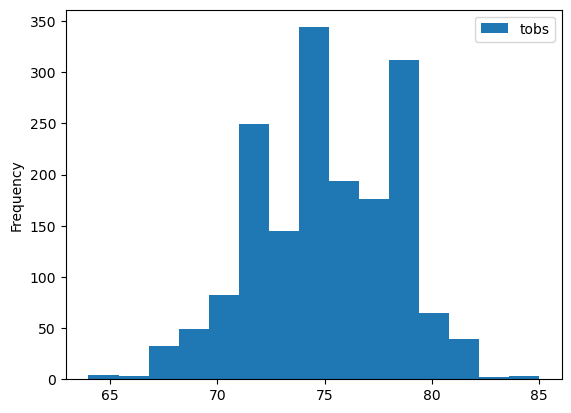

In [38]:
#june_df.plot()
june_df.plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

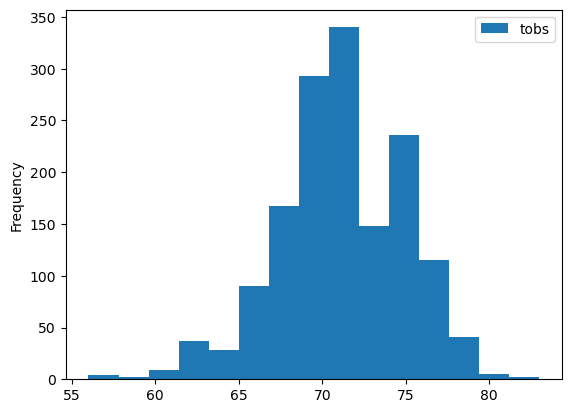

In [39]:
dec_df.plot.hist(bins=15)